In [1]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torchvision.datasets as dtst
from torch import optim

from PIL import Image

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import warnings
# warnings.filterwarnings('ignore')

%matplotlib inline

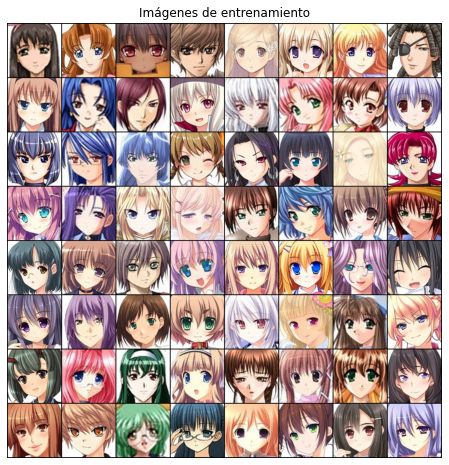

In [3]:
torch.manual_seed(1000)

# Asignamos  los paths de las imagenes en variables

data_folder='./images'

# Definimos las características de las imágenes

image_size = 128 #nustras imágenes tienen por dimensión 128*128

batch_size = 128 #será el conjunto de imagenes que se agarra por lote, 
# como estamos trabajando con casi 40 mil imágenes, tomaremos de 128 en 128
# si el proceso no muestra buen rendimiento, se trabajará con 
# un valor distinto

# Cantidad de hilos
workers = 4

# como nuestras imágenes son a color. Se trabajan 3 canales (RGB)
channels = 3

nz = 100
ngf = 64
ndf = 64


num_epochs = 100

# Según una publicación del creador del optimizador Adam, el mejor ratio 
# de aprendizaje es 3e-4
lr = 3e-4

# Esto hace referencia a que se usa la GPU:1 del computador, 
# suele ser la principal y es válido cuando se tiene una tarjeta  de video
# compatible con CUDA
ngpu=1


dsimgs = dtst.ImageFolder(root=data_folder,
                         transform=transforms.Compose([
# Se usa el resize en caso no todas las imágenes de entrada tengan el tamaño de 128px
                             transforms.Resize(image_size), 
# CenterCrop busca recortar la imagen en caso sea muy grande al tamaño dado
                             transforms.CenterCrop(image_size),
# ToTensor convierte finalmente la imagen a tensor
                             transforms.ToTensor(),
# Normalize permite la normalización de la información
# El problema encontrado es que necesitamos hallar la desviación estandar
# media de toda la información para realizar una correcta normalización
                             transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                         ]))

# DataLoader es básicamente un iterador que nos ayudará para el recorrido
# a través de las imágenes o información en general.
dt_loader = DataLoader(dsimgs,
                       batch_size=batch_size, 
                       shuffle=True, 
                       num_workers=workers)

# Aquí debería dejarse como el comentario, sin embargo a propósito hago uso
# directo de la GPU para trabajar como dispositivo principal
device = torch.device("cuda:0")# torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")


batch_imagenes = next(iter(dt_loader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Imágenes de entrenamiento")
plt.imshow(np.transpose(make_grid(batch_imagenes[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [ ]:
class redGeneradora(nn.Module):
    def __init__(self, ngpu):
        super(redGeneradora, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # Añadir proceso
        )
    
    def forward(self, input):
        return self.main(input)


In [ ]:
class redDiscriminadora(nn.Module):
    def __init__(self, ngpu):
        super(redDiscriminadora, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # Añadir proceso
        )

    def forward(self, input):
        return self.main(input)

In [ ]:

# Función de pérdida del tipo BCELoss
criterion = nn.BCELoss()

# Para ambos modelos usaremos ADAM como optimizador
RDoptimizer = optim.Adam()
RGOptimizer = optim.Adam()

In [ ]:
# Celda de entrenamiento

print("Entrenamiento")
# For each epoch
for epoch in range(num_epochs+1):
    ## Añadir el proceso de entrenamiento